code to combine copd and hyperthermia datasets into one

In [1]:
import pandas as pd

# File paths
file1 = 'cdc-hyperthermia-related-deaths.csv'
file2 = 'cdc-copd-related-deaths.csv'

# Read both CSVs
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2, header=None)

# Assign column names to df2 to match df1 (if needed)
df2.columns = df1.columns

# Add a column to indicate the source/cause if desired
df1['Cause'] = 'Hyperthermia'
df2['Cause'] = 'COPD'

# Combine the datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save or use combined_df as needed
print(combined_df.head())

        State            County County Code    Year Month Deaths  \
0  Washington  Adams County, WA     53001.0  2000.0   1.0      0   
1  Washington  Adams County, WA     53001.0  2000.0   2.0      0   
2  Washington  Adams County, WA     53001.0  2000.0   3.0      0   
3  Washington  Adams County, WA     53001.0  2000.0   4.0      0   
4  Washington  Adams County, WA     53001.0  2000.0   5.0      0   

       Population      Crude Rate         Cause  
0  Not Applicable  Not Applicable  Hyperthermia  
1  Not Applicable  Not Applicable  Hyperthermia  
2  Not Applicable  Not Applicable  Hyperthermia  
3  Not Applicable  Not Applicable  Hyperthermia  
4  Not Applicable  Not Applicable  Hyperthermia  


find which months of each year had the highest number of copd and hyperthermia deaths

In [1]:
import pandas as pd

# Load both datasets
hyperthermia_file = 'cdc-hyperthermia-related-deaths.csv'
copd_file = 'cdc-copd-related-deaths.csv'

# Read the CSVs
hyper_df = pd.read_csv(hyperthermia_file)
copd_df = pd.read_csv(copd_file)

# Add a 'Cause' column to each for identification
hyper_df['Cause'] = 'Hyperthermia'
copd_df['Cause'] = 'COPD'

# Combine datasets
combined = pd.concat([hyper_df, copd_df], ignore_index=True)

# Clean 'Deaths' column: convert to numeric, treat 'Suppressed' as NaN
combined['Deaths'] = pd.to_numeric(combined['Deaths'], errors='coerce')

# Group by Cause, Year, and Month, summing deaths across all counties/states
monthly_deaths = (
    combined.groupby(['Cause', 'Year', 'Month'])['Deaths']
    .sum(min_count=1)
    .reset_index()
)

# Find, for each Cause and Year, the Month(s) with the highest total deaths
result = (
    monthly_deaths
    .sort_values(['Cause', 'Year', 'Deaths'], ascending=[True, True, False])
    .groupby(['Cause', 'Year'])
    .head(1)
    .reset_index(drop=True)
)

print(result)

           Cause    Year  Month  Deaths
0           COPD  2000.0    1.0  1635.0
1           COPD  2001.0    3.0  1202.0
2           COPD  2002.0    3.0  1279.0
3           COPD  2003.0   12.0  1543.0
4           COPD  2004.0    1.0  1347.0
5           COPD  2005.0   12.0  1320.0
6           COPD  2006.0    1.0  1402.0
7           COPD  2007.0    1.0  1225.0
8           COPD  2008.0    2.0  1548.0
9           COPD  2009.0    3.0  1273.0
10          COPD  2010.0    3.0  1375.0
11          COPD  2011.0    3.0  1472.0
12          COPD  2012.0    3.0  1364.0
13          COPD  2013.0    1.0  1624.0
14          COPD  2014.0    1.0  1531.0
15          COPD  2015.0    1.0  1590.0
16          COPD  2016.0    3.0  1511.0
17          COPD  2017.0    1.0  1808.0
18          COPD  2018.0    1.0  1763.0
19          COPD  2019.0    3.0  1451.0
20          COPD  2020.0    3.0  1324.0
21  Hyperthermia  2000.0    1.0     0.0
22  Hyperthermia  2001.0    1.0     0.0
23  Hyperthermia  2002.0    1.0     0.0


/var/folders/v_/trlscpw51713n08j65gr98c40000gn/T/ipykernel_90683/1406576974.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cause')


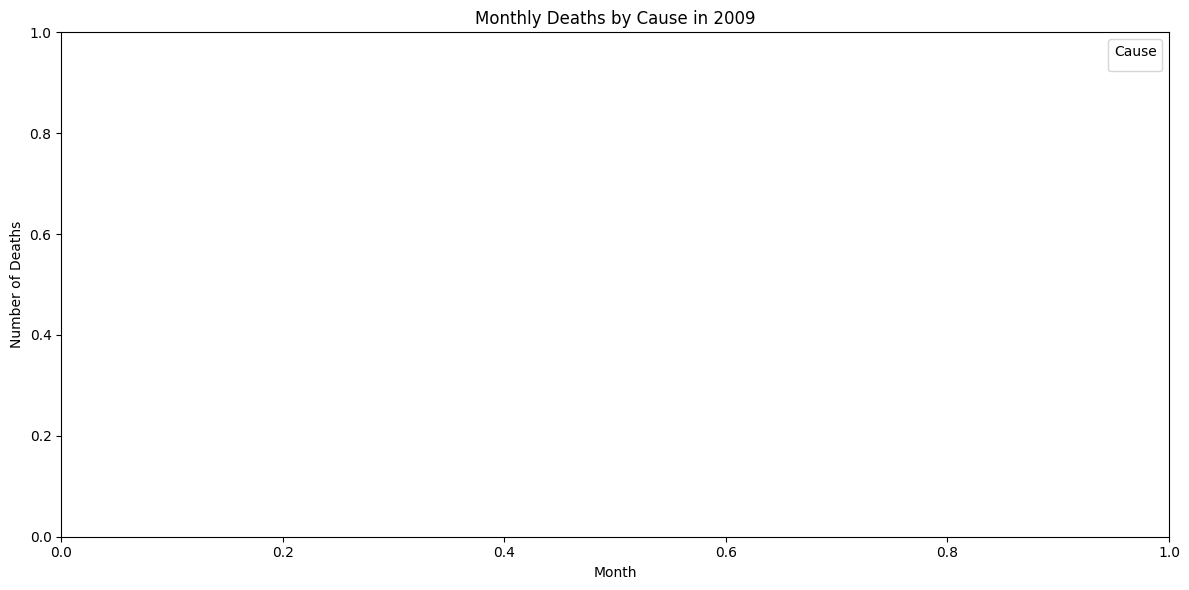

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
hyperthermia_file = 'cdc-hyperthermia-related-deaths.csv'
copd_file = 'cdc-copd-related-deaths.csv'

# Read the CSVs
hyper_df = pd.read_csv(hyperthermia_file, header=None)
copd_df = pd.read_csv(copd_file, header=None)

# Assign column names
column_names = ['State', 'County', 'FIPS', 'Year', 'Month', 'Deaths', 'Col7', 'Col8']
hyper_df.columns = column_names
copd_df.columns = column_names

# Add a 'Cause' column to each for identification
hyper_df['Cause'] = 'Hyperthermia'
copd_df['Cause'] = 'COPD'

# Combine datasets
combined = pd.concat([hyper_df, copd_df], ignore_index=True)

# Convert the 'Deaths' column to numeric, treating 'Suppressed' as missing
combined['Deaths'] = pd.to_numeric(combined['Deaths'], errors='coerce')

# Group by Cause, Year, and Month, summing deaths across all counties/states
monthly_deaths = (
    combined.groupby(['Cause', 'Year', 'Month'])['Deaths']
    .sum(min_count=1)
    .reset_index()
)

# Choose a year to visualize (e.g., 2009)
year_to_plot = 2009
plot_data = monthly_deaths[monthly_deaths['Year'] == year_to_plot]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x='Month',
    y='Deaths',
    hue='Cause',
    palette={'COPD': 'steelblue', 'Hyperthermia': 'tomato'}
)
plt.title(f'Monthly Deaths by Cause in {year_to_plot}')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.legend(title='Cause')
plt.tight_layout()
plt.show()

visual is not showing much because hyperthermia deaths are basically zero.